# Final Project - Training Data

This Notebook tests out different ML models and check the scores. 

The training dataset contains a total of 5933 samples. 

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.style.use('bmh')

In [2]:
# Loading Data
data_train = np.load('data_train.npy')
labels_train = np.load('labels_train.npy')

print(data_train.shape, labels_train.shape)

(270000, 5933) (5933,)


In [3]:
# Labels Encoding

labels_names = ['Nike',
                'Adidas',
                'Ford',
                'Honda',
                'General Mills',
                'Unilever',
                "McDonald's",
                'KFC',
                'Gators',
                '3M']

labels_names = ['Nike',
                'Adidas',
                'Ford',
                'Honda',
                'General_mills',
                'Unilever',
                "Mcdonalds",
                'KFC',
                'Gators',
                '3M']

In [4]:
'''
#CODE TO CHECK MISLABELS

from ipywidgets import interact, widgets
from IPython.display import display

# Define the function to display images for a given range
def show_images_chunk(start_idx, chunk_size):
    end_idx = start_idx + chunk_size
    
    fig, axes = plt.subplots(chunk_size, 1, figsize=(15, chunk_size * 3))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    for label_idx in range(1):  # Loop through each label
        label_samples = np.where(labels_train == label_idx)[0]
        
        for i, sample_idx in enumerate(label_samples[start_idx:end_idx]):
            ax = axes[i]
            ax.imshow(data_train[:, sample_idx].reshape((300, 300, 3)))
            ax.axis('off')
            ax.set_title('Index ' + str(sample_idx) + ': Label ' + str(label_idx) + ': ' + labels_names[label_idx], size=10)
    
    plt.show()

# Create interactive widgets
start_idx_widget = widgets.IntSlider(min=0, max=data_train.shape[1], step=100, value=0, description='Start Index')
chunk_size_widget = widgets.IntSlider(min=1, max=100, value=10, description='Chunk Size')

# Display interactive widgets and connect to the function
interact(show_images_chunk, start_idx=start_idx_widget, chunk_size=chunk_size_widget)
'''

"\n#CODE TO CHECK MISLABELS\n\nfrom ipywidgets import interact, widgets\nfrom IPython.display import display\n\n# Define the function to display images for a given range\ndef show_images_chunk(start_idx, chunk_size):\n    end_idx = start_idx + chunk_size\n    \n    fig, axes = plt.subplots(chunk_size, 1, figsize=(15, chunk_size * 3))\n    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)\n    \n    for label_idx in range(1):  # Loop through each label\n        label_samples = np.where(labels_train == label_idx)[0]\n        \n        for i, sample_idx in enumerate(label_samples[start_idx:end_idx]):\n            ax = axes[i]\n            ax.imshow(data_train[:, sample_idx].reshape((300, 300, 3)))\n            ax.axis('off')\n            ax.set_title('Index ' + str(sample_idx) + ': Label ' + str(label_idx) + ': ' + labels_names[label_idx], size=10)\n    \n    plt.show()\n\n# Create interactive widgets\nstart_idx_widget = widgets.IntSlider(min=0, ma

In [5]:
'''
#misclassified items from Hold out set
plt.figure(figsize=(20,6))
c = 0
for i in range(labels4.shape[0]):
    pred_index = np.argmax(y_pred_hold[i])
    if pred_index != labels4[i]:
        ax = plt.subplot(5, 10, c + 1)
        c+=1
        plt.imshow(data4[i])
        plt.title(f"{label_names[int(labels4[i])]} -> {label_names[pred_index]}")
        plt.axis("off")
'''










'''
corrected_labels_train = labels_train.copy()


changes = {
    0: [2400, 361, 2439, 1865, 2671, 893, 3625],
    1: [1288, 3033, 3037, 3599, 780, 3140, 3372],
    2: [1670, 673, 1995, 2804, 2769, 2714, 653],
    3: [2980, 2937, 603, 1819, 3704, 2025],
    4: [2665, 1649, 1777, 1563, 2986],
    5: [1587, 2750, 2763, 1917],
    6: [2015, 2388, 38, 401, 2818, 1875, 3675],
    7: [3154, 744, 452, 3283, 3412, 313],
    8: [556, 1213, 3253],
    9: [2940, 1314, 1108, 708, 3277, 728],
}


for new_label, indices_to_change in changes.items():
    for index in indices_to_change:
        corrected_labels_train[index] = new_label
        
labels_train = corrected_labels_train
'''

'\ncorrected_labels_train = labels_train.copy()\n\n\nchanges = {\n    0: [2400, 361, 2439, 1865, 2671, 893, 3625],\n    1: [1288, 3033, 3037, 3599, 780, 3140, 3372],\n    2: [1670, 673, 1995, 2804, 2769, 2714, 653],\n    3: [2980, 2937, 603, 1819, 3704, 2025],\n    4: [2665, 1649, 1777, 1563, 2986],\n    5: [1587, 2750, 2763, 1917],\n    6: [2015, 2388, 38, 401, 2818, 1875, 3675],\n    7: [3154, 744, 452, 3283, 3412, 313],\n    8: [556, 1213, 3253],\n    9: [2940, 1314, 1108, 708, 3277, 728],\n}\n\n\nfor new_label, indices_to_change in changes.items():\n    for index in indices_to_change:\n        corrected_labels_train[index] = new_label\n        \nlabels_train = corrected_labels_train\n'

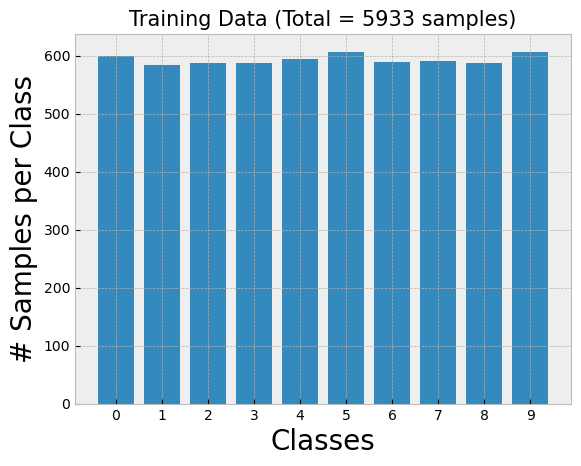

In [6]:
# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[1])+' samples)',size=15);

In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from skimage.transform import resize
from sklearn.svm import SVC
#import cv2

In [8]:
#Resizing images

from PIL import Image
import numpy as np

image_resized = []
dim = (64, 64)

for i in range(len(data_train.T)):
    image = data_train[:, i].reshape((300, 300, 3))

    # Convert RGB to BGR
    bgr_image = image[..., ::-1]

    image_pil = Image.fromarray(bgr_image.astype('uint8'))  # Convert to PIL image
    resized_pil = image_pil.resize(dim, Image.ANTIALIAS)  # Resize using Pillow's resize function

    # Convert back to BGR
    resized_bgr = np.array(resized_pil)
    resized_rgb = resized_bgr[..., ::-1]

    image_resized.append(resized_rgb)

# Convert the list of resized images to a NumPy array
image_resized = np.array(image_resized)


'''
from PIL import Image

image_resized = []
target_size = (64, 64)

for i in range(len(data_train.T)):
    image = data_train[:, i].reshape((300, 300, 3))
    pil_image = Image.fromarray(image.astype('uint8'))
    resized_image = pil_image.resize(target_size, Image.ANTIALIAS)
    image_resized.append(np.array(resized_image))

image_resized = np.array(image_resized)

'''

'''
image_resized = []
dim = (64, 64)
for i in range(len(data_train.T)):
    image = data_train[:,i].reshape((300,300,3))
    image_resized.append(cv2.resize(image, dim, interpolation = cv2.INTER_AREA))
    
image_resized = np.array(image_resized)
'''

/var/folders/87/nhh_mdjd5dj3s1fc5vmd_28r0000gn/T/ipykernel_70803/3946634910.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_pil = image_pil.resize(dim, Image.ANTIALIAS)  # Resize using Pillow's resize function


'\nimage_resized = []\ndim = (64, 64)\nfor i in range(len(data_train.T)):\n    image = data_train[:,i].reshape((300,300,3))\n    image_resized.append(cv2.resize(image, dim, interpolation = cv2.INTER_AREA))\n    \nimage_resized = np.array(image_resized)\n'

In [9]:
X_train, X_test, t_train, t_test = train_test_split(image_resized, labels_train, 
                                                   test_size=0.2,
                                                   stratify=labels_train,
                                                   random_state=0)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)

(4746, 64, 64, 3)
(4746,)
(1187, 64, 64, 3)
(1187,)


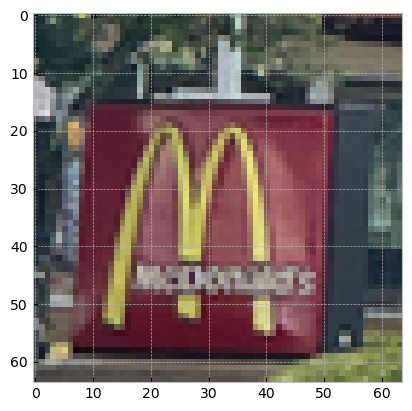

In [10]:
# Example image
plt.imshow(X_train[5])



In [11]:
X_train = np.array([X_train[i].flatten() for i in range (len(X_train))])
X_test = np.array([X_test[i].flatten() for i in range (len(X_test))])

print(X_train.shape)
print(X_test.shape)

(4746, 12288)
(1187, 12288)


## 1.) Logistic Regression (Model No.1)

In [ ]:
mod1 = Pipeline([('SCALER', MinMaxScaler()),
                    ('LOGREG' , LogisticRegression(tol = 0.01))])

In [ ]:
mod1.fit(X_train, t_train)

In [ ]:
pred_test1 = mod1.predict(X_test)

In [ ]:
print('LR\n')
print('Accuracy:\n',accuracy_score(t_test, pred_test1))
print ('F1_score:\n',f1_score(t_test, pred_test1, average=None))
print('Confusion matrix:\n',confusion_matrix(t_test, Y_test3))

---

## 2.) LDA + LOGISTIC REGRESSION (Model No.2)

In [ ]:
mod2 = Pipeline([('SCALER', StandardScaler()),
                 ('LDA', LDA(n_components=8)),
                 ('LOGRES', LogisticRegression())])
mod2.fit(X_train, t_train)



In [ ]:
pred_test2 = mod2.predict(X_test)

In [ ]:
print('LR\n')
print('Accuracy:\n',accuracy_score(t_test, pred_test2))
print ('F1_score:\n',f1_score(t_test, pred_test2, average=None))
print('Confusion matrix:\n',confusion_matrix(t_test, pred_test2))

## 3.) PCA + LOGISTIC REGRESSION (Model No. 3)

In [ ]:
N, D = np.shape(X_train)
pca = PCA(n_components=min(N,D))
pca.fit(X_train)

plt.step(range(1,min(N,D)+1),np.cumsum(pca.explained_variance_ratio_)*100)

print(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9))
print(np.cumsum(pca.explained_variance_ratio_)[20])
plt.xlabel('Number of principal components');
plt.ylabel('% Variance explained');

In [ ]:
mod3 = Pipeline([('SCALER', StandardScaler()),
                 ('PCA', PCA(n_components=500)),
                 ('LOGREG', LogisticRegression(random_state=0, tol=0.01))]) 

In [ ]:
mod3.fit(X_train, t_train)

In [ ]:
pred_test3 = mod3.predict(X_test)

print('With PCA:')
print('Test Accuracy Score = ',accuracy_score(t_test, pred_test3))
print('Confusion matrix:')
print(confusion_matrix(t_test, Y_test))


## 4.) CNN (Model No.4)

In [12]:
import tensorflow as tf
from tensorflow import keras

2023-08-08 19:29:21.809557: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train.npy')

X_train_full.shape, t_train_full.shape

((5933, 270000), (5933,))

In [14]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

((5043, 270000), (5043,), (4034, 270000), (4034,), (1009, 270000), (1009,))

In [15]:
del X_train_full, t_train_full
# free up space

In [16]:

X_training = X_training.reshape(X_training.shape[0], 300, 300, 3)/255.0

X_train = X_train.reshape(X_train.shape[0], 300, 300, 3)/255.0

X_val = X_val.reshape(X_val.shape[0], 300, 300, 3)/255.0

X_test = X_test.reshape(X_test.shape[0], 300, 300, 3)/255.0


'\nX_training = X_training.reshape(X_training.shape[0], 300, 300, 3)/255.0\n\nX_train = X_train.reshape(X_train.shape[0], 300, 300, 3)/255.0\n\nX_val = X_val.reshape(X_val.shape[0], 300, 300, 3)/255.0\n\nX_test = X_test.reshape(X_test.shape[0], 300, 300, 3)/255.0\n'

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[300,300,3]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
             metrics=['accuracy'])

2023-08-08 19:29:41.804942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.fit(X_train, t_train, epochs=2, batch_size=32,
          validation_data=(X_val, t_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/2


ValueError: in user code:

    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 300, 300, 3), found shape=(None, 270000)


In [20]:
model.evaluate(X_test, t_test)

ValueError: in user code:

    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/SuperPawn/opt/anaconda3/envs/fml/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 300, 300, 3), found shape=(None, 270000)
